In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np


data_df = pd.read_csv("Data_Science_Salaries_Clean.csv")
data_df = pd.DataFrame(data_df)
data_df.tail(15)


,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
2213,3276,Data Scientist,Full-Time,Senior,Expert,80000,Euro,Austria,91237,Austria,Small,2020
2214,3277,Data Scientist,Full-Time,Mid,Intermediate,55000,Euro,Luxembourg,62726,France,Small,2020
2215,3278,Data Scientist,Full-Time,Mid,Intermediate,115000,United States Dollar,United States,115000,United States,Large,2021
2216,3281,Data Analyst,Full-Time,Mid,Intermediate,75000,United States Dollar,United States,75000,United States,Large,2021
2217,3282,Data Analyst,Full-Time,Mid,Intermediate,62000,United States Dollar,United States,62000,United States,Large,2021
2218,3283,Data Scientist,Full-Time,Mid,Intermediate,73000,United States Dollar,United States,73000,United States,Large,2021
2219,3284,Data Engineer,Full-Time,Mid,Intermediate,38400,Euro,Netherlands,45391,Netherlands,Large,2021
2220,3286,Data Scientist,Full-Time,Mid,Intermediate,118000,United States Dollar,United States,118000,United States,Medium,2020
2221,3287,Data Scientist,Full-Time,Mid,Intermediate,138350,United States Dollar,United States,138350,United States,Medium,2020
2222,3288,Data Engineer,Full-Time,Mid,Intermediate,130800,United States Dollar,United States,130800,Spain,Medium,2020


In [2]:
salary_stats_df = data_df.groupby("Job Title")["Salary in USD"].agg(["mean", "median", "max", "min"])
salary_stats_df = salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
salary_stats_df = salary_stats_df.applymap('${:,.2f}'.format)
salary_stats_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays a the statistics beind each Job Title regardless of Experience Level or Expertiise Level 

,Average Salary,Median Salary,Maximum Salary,Minimum Salary
Job Title,,,,
Analytics Engineer,"$154,258.96","$149,400.00","$430,640.00","$48,000.00"
Data Analyst,"$109,500.38","$105,320.00","$430,967.00","$15,000.00"
Data Engineer,"$142,033.87","$135,223.00","$333,500.00","$17,025.00"
Data Scientist,"$141,886.16","$140,000.00","$412,000.00","$16,000.00"
Machine Learning Engineer,"$167,249.51","$161,310.00","$392,000.00","$20,000.00"


In [3]:
experience_salary_stats_df = data_df.groupby(["Job Title", "Experience Level"])["Salary in USD"].agg(["mean", "median", "max", "min"])
experience_salary_stats_df = experience_salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
experience_salary_stats_df = experience_salary_stats_df.applymap('${:,.2f}'.format)
experience_salary_df = experience_salary_stats_df.reindex(["Entry", "Mid", "Senior", "Executive"], level="Experience Level")
experience_salary_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays a the statistics beind each Job Title at every Experience Level

Average Salary Median Salary  \
Job Title                 Experience Level                                
Analytics Engineer        Entry               $101,333.33    $90,000.00   
                          Mid                 $129,486.05   $112,400.00   
                          Senior              $159,379.76   $152,250.00   
                          Executive           $175,125.00   $166,000.00   
Data Analyst              Entry                $64,327.75    $57,920.00   
                          Mid                  $99,194.70    $93,000.00   
                          Senior              $123,588.47   $119,610.00   
                          Executive           $113,750.00   $120,000.00   
Data Engineer             Entry                $75,370.02    $65,000.00   
                          Mid                 $105,866.78    $95,000.00   
                          Senior              $155,895.87   $152,437.50   
                          Executive           $194,317.00   $200,000.00   
Data Scientist            Entry                $75,021.37    $74,141.00   
                          Mid                  $96,619.08    $90,367.00   
                          Senior              $167,714.71   $164,500.00   
                          Executive           $188,429.58   $185,000.00   
Machine Learning Engineer Entry                $98,389.35    $92,500.00   
                          Mid                 $131,848.55   $126,277.00   
                          Senior              $184,850.77   $182,200.00   

                                           Maximum Salary Minimum Salary  
Job Title                 Experience Level                                
Analytics Engineer        Entry               $130,000.00     $84,000.00  
                          Mid                 $430,640.00     $48,000.00  
                          Senior              $289,800.00     $48,000.00  
                          Executive           $221,000.00    $135,000.00  
Data Analyst              Entry               $150,000.00     $15,000.00  
                          Mid                 $430,967.00     $15,680.00  
                          Senior              $385,000.00     $15,809.00  
                          Executive           $160,000.00     $55,000.00  
Data Engineer             Entry               $160,000.00     $17,025.00  
                          Mid                 $260,000.00     $20,000.00  
                          Senior              $331,640.00     $25,000.00  
                          Executive           $333,500.00     $71,908.00  
Data Scientist            Entry               $190,000.00     $16,000.00  
                          Mid                 $230,000.00     $16,904.00  
                          Senior              $412,000.00     $20,171.00  
                          Executive           $300,000.00     $78,000.00  
Machine Learning Engineer Entry               $250,000.00     $20,000.00  
                          Mid                 $300,000.00     $20,984.00  
                          Senior              $392,000.00     $24,342.00

In [4]:
new_experience_salary_stats_df = data_df.groupby(["Job Title", "Experience Level"])["Salary in USD"].agg(["mean"])
new_experience_salary_stats_df = new_experience_salary_stats_df.rename(columns={"mean": "Average Salary"})
newer_experience_salary_df = new_experience_salary_stats_df.reindex(["Entry", "Mid", "Senior", "Executive"], level="Experience Level")
newer_experience_salary_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays the Average Salary beind each Job Title at every Experience Level

Average Salary
Job Title                 Experience Level                
Analytics Engineer        Entry              101333.333333
                          Mid                129486.047619
                          Senior             159379.760000
                          Executive          175125.000000
Data Analyst              Entry               64327.754386
                          Mid                 99194.704000
                          Senior             123588.472527
                          Executive          113750.000000
Data Engineer             Entry               75370.023256
                          Mid                105866.783133
                          Senior             155895.868182
                          Executive          194317.000000
Data Scientist            Entry               75021.366667
                          Mid                 96619.082278
                          Senior             167714.711055
                          Executive          188429.578947
Machine Learning Engineer Entry               98389.350000
                          Mid                131848.552239
                          Senior             184850.769953

In [11]:
Analytics_engineer_entry = newer_experience_salary_df.loc[("Analytics Engineer", "Entry"), "Average Salary"]
Analytics_engineer_mid = newer_experience_salary_df.loc[("Analytics Engineer", "Mid"), "Average Salary"] 
AE_e_to_m = Analytics_engineer_mid - Analytics_engineer_entry
AE_e_to_m = "${:,.2f}".format(AE_e_to_m)

print(f'A Data Engineer on average makes {AE_e_to_m} more after being promoted from Entry Level Analyst to Intermediate Level Analyst')

#-------------------------------------------------------------------------------------------------------------------------------

Analytics_engineer_s = newer_experience_salary_df.loc[("Analytics Engineer", "Senior"), "Average Salary"]
AE_m_to_s = Analytics_engineer_s - Analytics_engineer_mid
AE_m_to_s = "${:,.2f}".format(AE_m_to_s)

print(f'A Data Engineer on average makes {AE_m_to_s} more after being promoted from Intermidiate Analyst to Senior Analyst')

#-------------------------------------------------------------------------------------------------------------------------------

Analytics_engineer_ex = newer_experience_salary_df.loc[("Analytics Engineer", "Executive"), "Average Salary"]

AE_s_to_ex = Analytics_engineer_ex - Analytics_engineer_s
AE_s_to_ex


A Data Engineer on average makes $28,152.71 more after being promoted from Entry Level Analyst to Intermediate Level Analyst
A Data Engineer on average makes $29,893.71 more after being promoted from Intermidiate Analyst to Senior Analyst


15745.23999999999

In [ ]:
expert_salary_stats_df = data_df.groupby(["Job Title", "Expertise Level"])["Salary in USD"].agg(["mean", "median", "max", "min"])
expert_salary_stats_df = expert_salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
expert_salary_stats_df = expert_salary_stats_df.applymap('${:,.2f}'.format)
expert_salary_df = expert_salary_stats_df.reindex(["Junior", "Intermediate", "Expert", "Director"], level="Expertise Level")
expert_salary_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays a the statistics beind each Job Title at every Expertise Level

In [34]:
new_expert_salary_stats_df = data_df.groupby(["Job Title", "Expertise Level"])["Salary in USD"].agg(["mean"])
new_expert_salary_stats_df = new_expert_salary_stats_df.rename(columns={"mean": "Average Salary"})
newer_expert_salary_stats_df = expert_salary_stats_df.reindex(["Junior", "Intermediate", "Expert", "Director"], level="Expertise Level")


newer_expert_salary_stats_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays the Average Salary beind each Job Title at every Expertise Level

Average Salary Median Salary  \
Job Title                 Expertise Level                                
Analytics Engineer        Junior             $101,333.33    $90,000.00   
                          Intermediate       $129,486.05   $112,400.00   
                          Expert             $159,379.76   $152,250.00   
                          Director           $175,125.00   $166,000.00   
Data Analyst              Junior              $64,327.75    $57,920.00   
                          Intermediate        $99,194.70    $93,000.00   
                          Expert             $123,588.47   $119,610.00   
                          Director           $113,750.00   $120,000.00   
Data Engineer             Junior              $75,370.02    $65,000.00   
                          Intermediate       $105,866.78    $95,000.00   
                          Expert             $155,895.87   $152,437.50   
                          Director           $194,317.00   $200,000.00   
Data Scientist            Junior              $75,021.37    $74,141.00   
                          Intermediate        $96,619.08    $90,367.00   
                          Expert             $167,714.71   $164,500.00   
                          Director           $188,429.58   $185,000.00   
Machine Learning Engineer Junior              $98,389.35    $92,500.00   
                          Intermediate       $131,848.55   $126,277.00   
                          Expert             $184,850.77   $182,200.00   

                                          Maximum Salary Minimum Salary  
Job Title                 Expertise Level                                
Analytics Engineer        Junior             $130,000.00     $84,000.00  
                          Intermediate       $430,640.00     $48,000.00  
                          Expert             $289,800.00     $48,000.00  
                          Director           $221,000.00    $135,000.00  
Data Analyst              Junior             $150,000.00     $15,000.00  
                          Intermediate       $430,967.00     $15,680.00  
                          Expert             $385,000.00     $15,809.00  
                          Director           $160,000.00     $55,000.00  
Data Engineer             Junior             $160,000.00     $17,025.00  
                          Intermediate       $260,000.00     $20,000.00  
                          Expert             $331,640.00     $25,000.00  
                          Director           $333,500.00     $71,908.00  
Data Scientist            Junior             $190,000.00     $16,000.00  
                          Intermediate       $230,000.00     $16,904.00  
                          Expert             $412,000.00     $20,171.00  
                          Director           $300,000.00     $78,000.00  
Machine Learning Engineer Junior             $250,000.00     $20,000.00  
                          Intermediate       $300,000.00     $20,984.00  
                          Expert             $392,000.00     $24,342.00

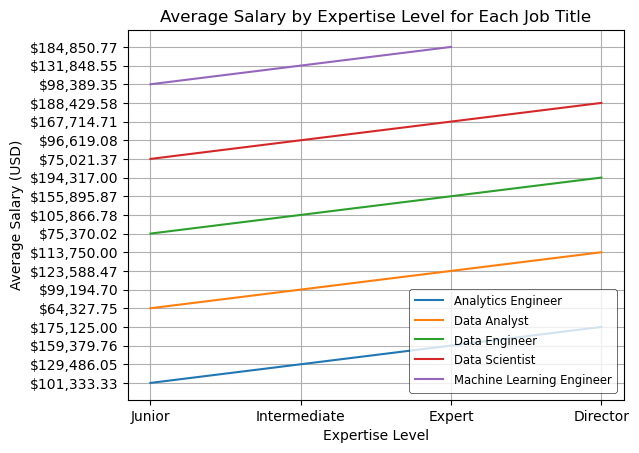

In [35]:
job_titles = newer_expert_salary_stats_df.index.get_level_values(0).unique()
fig, ax = plt.subplots()
for job_title in job_titles:
    expertise_levels = newer_expert_salary_stats_df.loc[job_title].index
    average_salaries = newer_expert_salary_stats_df.loc[job_title]["Average Salary"]
    ax.plot(expertise_levels, average_salaries, label=job_title)
    
ax.set_xlabel("Expertise Level")
ax.set_ylabel("Average Salary (USD)")
ax.set_title("Average Salary by Expertise Level for Each Job Title")

legend = ax.legend(loc='lower right')
legend.get_frame().set_linewidth(0.5)  
legend.get_frame().set_edgecolor('black')  
plt.setp(legend.get_texts(), fontsize='small')  

plt.grid()

plt.show()

#This PLot displays the Average Salary beind each Job Title at every Expertise Level

In [36]:
data_analyst_df = data_df.loc[data_df['Job Title'] == 'Data Analyst', ["Experience Level", "Salary in USD"]]
data_analyst_df

,Experience Level,Salary in USD
20,Senior,204500
21,Senior,138900
36,Senior,169000
37,Senior,110600
47,Senior,53120
...,...,...
2170,Senior,63831
2171,Senior,71786
2187,Mid,85000
2216,Mid,75000


In [37]:
data_analyst_df['Experience Level'] = data_analyst_df['Experience Level'].replace('Senior', '3')
data_analyst_df['Experience Level'] = data_analyst_df['Experience Level'].replace('Entry', '1')
data_analyst_df['Experience Level'] = data_analyst_df['Experience Level'].replace('Mid', '2')
data_analyst_df['Experience Level'] = data_analyst_df['Experience Level'].replace('Executive', '4')
data_analyst_df

,Experience Level,Salary in USD
20,3,204500
21,3,138900
36,3,169000
37,3,110600
47,3,53120
...,...,...
2170,3,63831
2171,3,71786
2187,2,85000
2216,2,75000


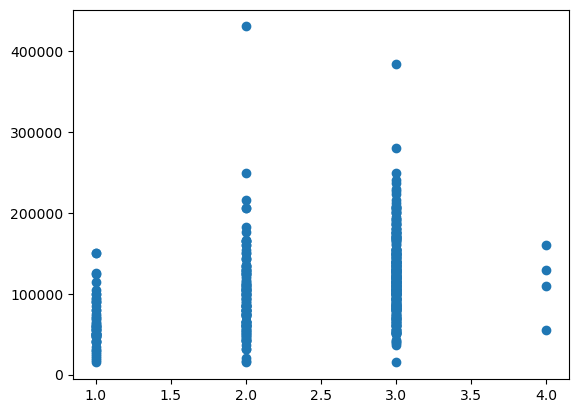

In [40]:
plt.scatter(data_analyst_df['Experience Level'].astype(int), data_analyst_df['Salary in USD'])
plt.show()